## Eksik Veri Yapısının Görselleştirilmesi

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [16]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

In [18]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


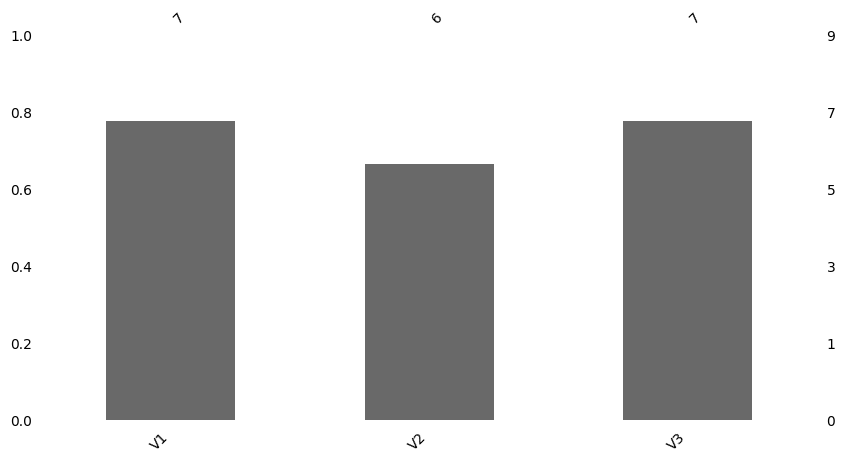

In [66]:
msno.bar(df, figsize=(10,5),fontsize=10);

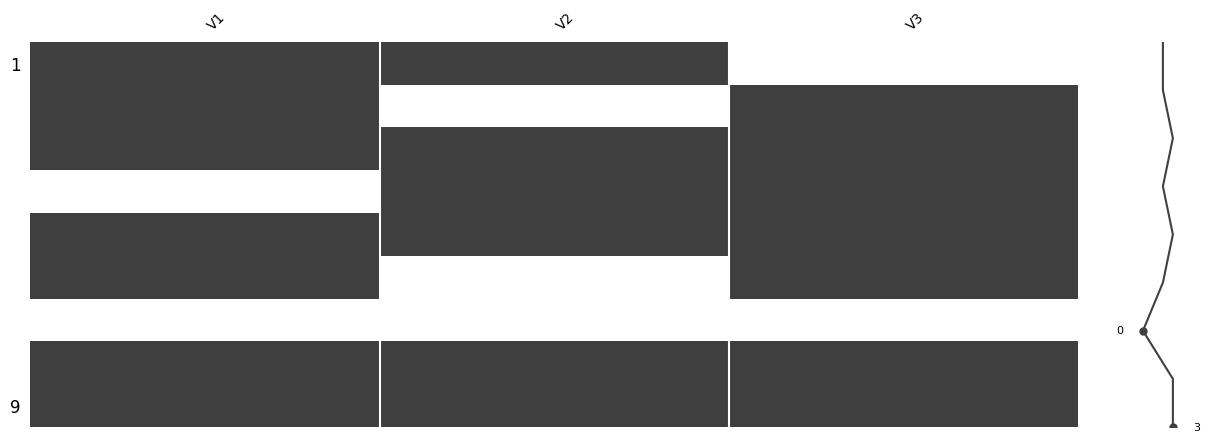

In [98]:
msno.matrix(df, figsize=(15,5), fontsize=10);

In [72]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [100]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [104]:
planets = sns.load_dataset("planets")

In [106]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [112]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

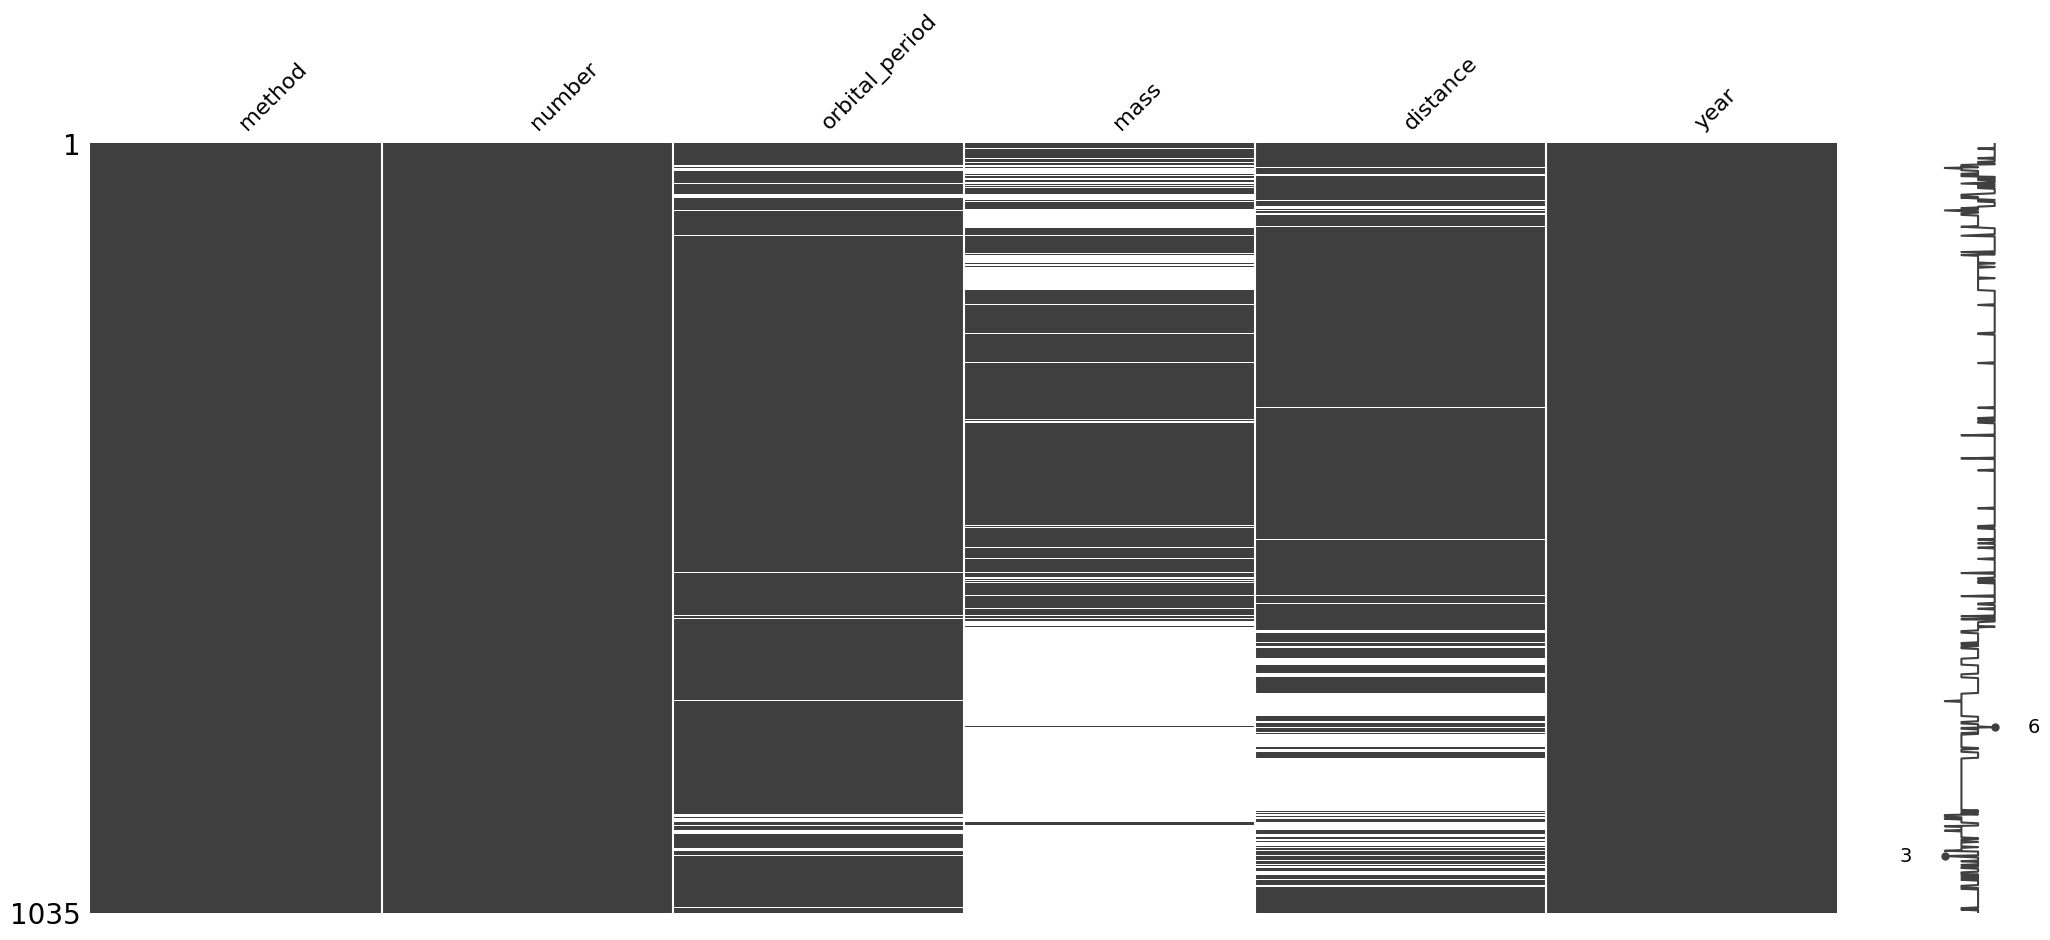

In [110]:
msno.matrix(planets);

### 📌 Nullity Correlation (Boşluk Korelasyonu) Nedir?

**Nullity Correlation (Boşluk Korelasyonu),** bir veri kümesindeki **eksik (NaN) değerlerin birbirleriyle olan ilişkisini ölçen bir metriktir.**

Hangi değişkenlerde eksik değerlerin birlikte oluştuğunu anlamaya yardımcı olur.

Eksik verilerin birbirleriyle olan bağlantısını ölçer.

Eksik verileri doldurma ve veri temizleme süreçlerinde faydalıdır.

**Isı haritasında bize verilen ve -1 ile 1 arasın yer alan değerler Nullity Correlation değerleridir.**

### 🎯 Nullity Correlation Neden Önemlidir?
Bazen bir veri setinde **bazı değişkenlerde eksiklikler bir arada olabilir.**

**Örneğin, bir hastane veri setinde:**

- Kan basıncı bilgisi eksik olan hastaların, yaş bilgisi de eksik olabilir.
  
- Gelir bilgisi eksik olan kişilerin, eğitim durumu bilgisi de eksik olabilir.
  
- Bu durumları anlamak, veri analizi ve eksik veri doldurma (imputation) sürecinde kritik bir adımdır.


### 📊 Nullity Correlation Nasıl Hesaplanır?
Nullity Correlation, değişkenler arasındaki eksik değerlerin (NaN'lerin) nasıl birlikte hareket ettiğini gösterir.

- **+1 (Pozitif Korelasyon):** İki sütun da aynı anda eksik olma eğilimindedir.
  
- **-1 (Negatif Korelasyon):** Biri eksikken diğeri dolu olma eğilimindedir.

- **0 (Korelasyon Yok):** Eksiklikler rastgele oluşur.


### 🚀 Nullity Correlation ile Neler Yapabiliriz?

1️⃣ Eksik değerlerin hangi değişkenlerde birlikte olduğunu anlarız.

2️⃣ Eksik değerleri doldurma (imputation) stratejisi geliştirebiliriz.

3️⃣ Eksik veri analizine dayalı değişken seçimi yapabiliriz.

4️⃣ Eksik verilerin rastgele mi yoksa belirli bir modele göre mi oluştuğunu inceleriz.

**📌 Özetle:**

Nullity Correlation, eksik değerlerin birlikte nasıl oluştuğunu analiz ederek, veriyi daha iyi temizlememizi ve eksik değerleri daha doğru doldurmamızı sağlar.

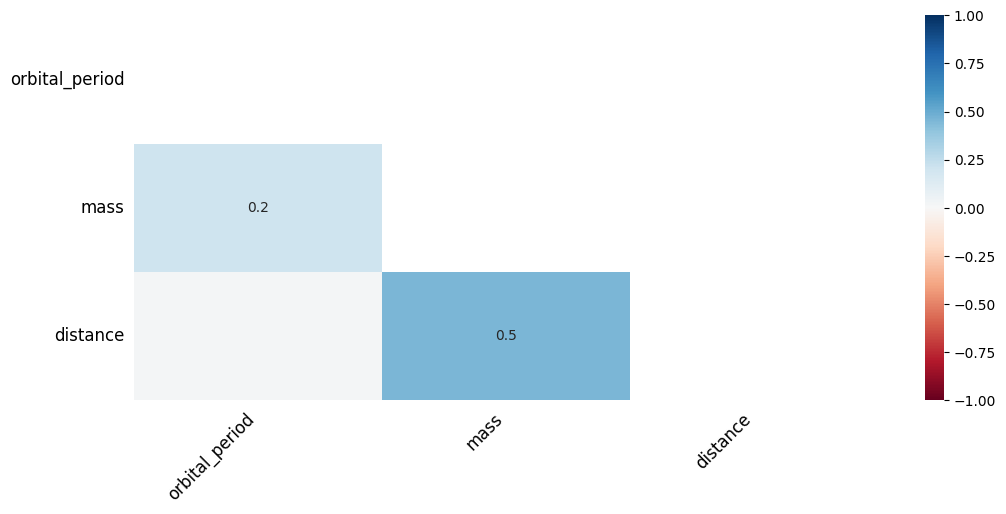

In [144]:
msno.heatmap(planets, figsize = (12,5),fontsize=12); # Eksik değerlerin gözlemlenmesinde kullanılan ısı haritası...

## Silme Yöntemleri

In [179]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [181]:
df.dropna() # Eksik değere sahip tüm gözlem birimlerini siler.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [187]:
df.dropna(how="all") # Tamamı eksik değerlerden oluşan gözlem birimlerini siler.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [207]:
df.dropna(how="any",axis=1) # axis=1 ile sütun bazında içerisinde en az 1 tane eksik değer barındıran gözlem birimlerini silme işlemi... 

""
0
1
2
3
4
5
6
7
8


In [201]:
df["V4"] = np.NaN

In [203]:
df

,V1,V2,V3,V4
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [205]:
df.dropna(axis=1, how="all") # axis=1 ile sütun bazında tüm değerleri NaN olan gözlem birimlerini silme işlemi... 

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [210]:
df

,V1,V2,V3,V4
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [212]:
df.dropna(axis=1, how="all",inplace=True)

In [214]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Değer Atama Yöntemleri

In [5]:
import numpy as np
import pandas as pd

In [7]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Sayısal Değişkenlerde Atama

In [9]:
df.V1.fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [11]:
df.V1.fillna(df.V1.mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [47]:
# Tüm Değişkenleri Kendi Ortalama Değeri ile Doldurma İşlemi-1:
df.apply(lambda x : round(x.fillna(x.mean()), 1),axis = 0)

,V1,V2,V3
0,1.0,7.0,11.0
1,3.0,6.2,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,6.2,7.0
6,6.0,6.2,11.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [43]:
df.mean()

V1     6.000000
V2     6.166667
V3    11.000000
dtype: float64

In [51]:
# Tüm Değişkenleri Kendi Ortalama Değeri ile Doldurma İşlemi-2:
df.fillna(round(df.mean(),1))

,V1,V2,V3
0,1.0,7.0,11.0
1,3.0,6.2,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,6.2,7.0
6,6.0,6.2,11.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## where() fonksiyonu

pandas.DataFrame.where() fonksiyonu, belirli bir koşulu sağlayan değerleri korurken, sağlamayanları belirli bir değerle (varsayılan olarak NaN) değiştirmek için kullanılır. Bu fonksiyon, koşullu seçim yapmak için oldukça faydalıdır.

**Parametreler:**

**cond:** Koşul ifadesi (True olanlar korunur, False olanlar değiştirilir).

**other:** Koşulu sağlamayan değerlerin yerine konacak değer (varsayılan NaN).

**inplace:** Eğer True yapılırsa, orijinal DataFrame doğrudan değiştirilir.

**axis:** Eğer uygulanacak ekseni belirtmek gerekirse kullanılır.

**level:** Çok seviyeli indeksler için belirli bir seviyeyle çalışmayı sağlar.

**errors:** Varsayılan olarak 'raise' şeklindedir, hata oluştuğunda hata mesajı verir.

DataFrame.where(cond, other=np.nan, inplace=False, axis=None, level=None, errors='raise')

### Where Fonksiyonu ile Eksik Değer Doldurma İşlemi:

In [75]:
df.where(df.notna(), round(df.mean(),1), axis = 1)

,V1,V2,V3
0,1.0,7.0,11.0
1,3.0,6.2,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,6.2,7.0
6,6.0,6.2,11.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Kategorik Değişken Kırılımında Değer Atama

In [80]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [118]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [126]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik Değişkenler için Eksik Değer Atama

In [132]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [168]:
df.departman

0     IT
1    NaN
2     IK
3     IK
4     IK
5     IK
6     IK
7     IT
8     IT
Name: departman, dtype: object

In [137]:
df["departman"].mode()

0    IK
Name: departman, dtype: object

In [160]:
df.departman.fillna(df.departman.mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [170]:
df.departman.fillna(method = "ffill") # "departman" sütununda yer alan eksik değeri, kendisinden önce gelen değerle doldurma işlemi...

C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_14888\512919643.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.departman.fillna(method = "ffill") # "departman" sütununda yer alan eksik değeri, kendisinden önce gelen değerle doldurma işlemi...


0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [172]:
df.departman.fillna(method = "bfill") # "departman" sütununda yer alan eksik değeri, kendisinden sonra gelen değerle doldurma işlemi...


C:\Users\ASUS ROG STRIX\AppData\Local\Temp\ipykernel_14888\3432179539.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.departman.fillna(method = "bfill") # "departman" sütununda yer alan eksik değeri, kendisinden sonra gelen değerle doldurma işlemi...


0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object